1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) 
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset)
3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters
4. Use linear regression model on different clusters separately and print the coefficients of the models individually 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [8]:
Missing_Values= ["?"]

In [19]:
df=pd.read_csv("cars-dataset.csv",index_col='car name')

### Explanatory Data Analysis

In [23]:
print(df.head(5))
print(df.index)
print(df.columns)

                           cyl   disp   hp    wt   acc  yr   mpg
car name                                                        
chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
buick skylark 320            8  350.0  165  3693  11.5  70  15.0
plymouth satellite           8  318.0  150  3436  11.0  70  18.0
amc rebel sst                8  304.0  150  3433  12.0  70  16.0
ford torino                  8  302.0  140  3449  10.5  70  17.0
Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=398)
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr',

In [26]:
df.shape

(398, 7)

In [27]:
df.isnull().any()

cyl     False
disp    False
hp      False
wt      False
acc     False
yr      False
mpg     False
dtype: bool

In [28]:
df.dtypes

cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [31]:
df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [38]:
print("When we print out all the unique values in horsepower, we find that there is ? which was used as a placeholder for missing values. Lest remove these entries.")

When we print out all the unique values in horsepower, we find that there is ? which was used as a placeholder for missing values. Lest remove these entries.


In [40]:
df = df[df.hp != '?']

In [41]:
print('?' in df)

False


In [42]:
df.shape

(392, 7)

In [43]:
df.dtypes

cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [44]:
df.hp = df.hp.astype('float')
df.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [45]:
df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [46]:
df.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

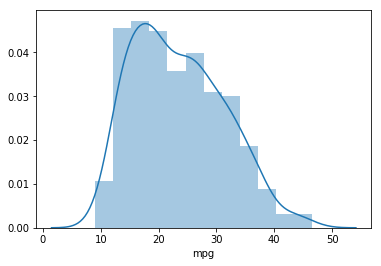

In [47]:
sns.distplot(data['mpg'])

In [48]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [49]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [50]:
df_scale = df.copy()

In [52]:
df_scale ['disp'] = scale(df_scale['disp'])
df_scale['hp'] = scale(df_scale['hp'])
df_scale ['acc'] = scale(df_scale['acc'])
df_scale ['wt'] = scale(df_scale['wt'])
df_scale['mpg'] = scale(df_scale['mpg'])

In [53]:
df_scale.head()

,cyl,disp,hp,wt,acc,yr,mpg
car name,,,,,,,
chevrolet chevelle malibu,8,0.617571,0.456522,0.536150,0.238095,70,0.239362
buick skylark 320,8,0.728682,0.646739,0.589736,0.208333,70,0.159574
plymouth satellite,8,0.645995,0.565217,0.516870,0.178571,70,0.239362
amc rebel sst,8,0.609819,0.565217,0.516019,0.238095,70,0.186170
ford torino,8,0.604651,0.510870,0.520556,0.148810,70,0.212766


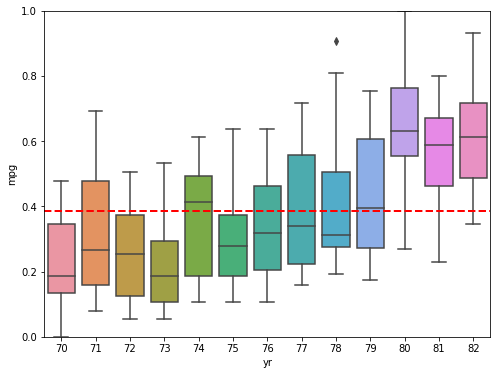

In [55]:
var = 'yr'
data_plt = pd.concat([df_scale['mpg'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

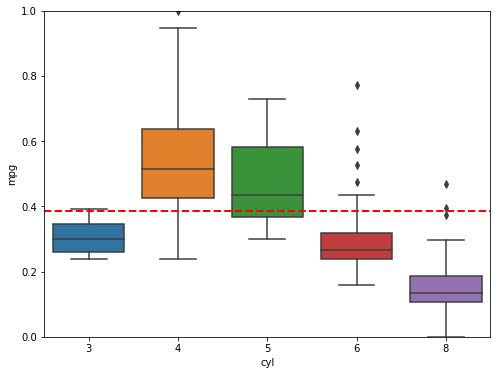

In [58]:
var = 'cyl'
data_plt = pd.concat([df_scale['mpg'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [76]:
df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
disp,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
hp,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
wt,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acc,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
yr,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


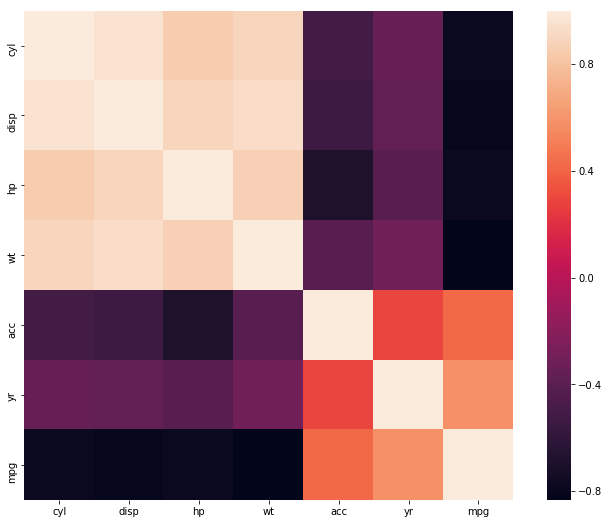

In [59]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

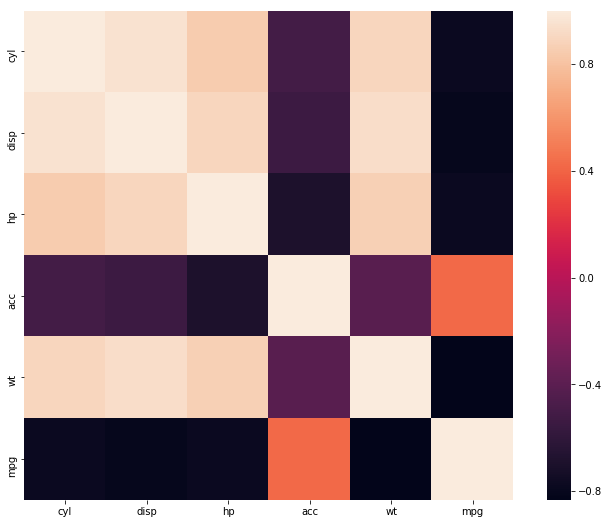

In [60]:
factors = ['cyl','disp','hp','acc','wt','mpg']
corrmat = df[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

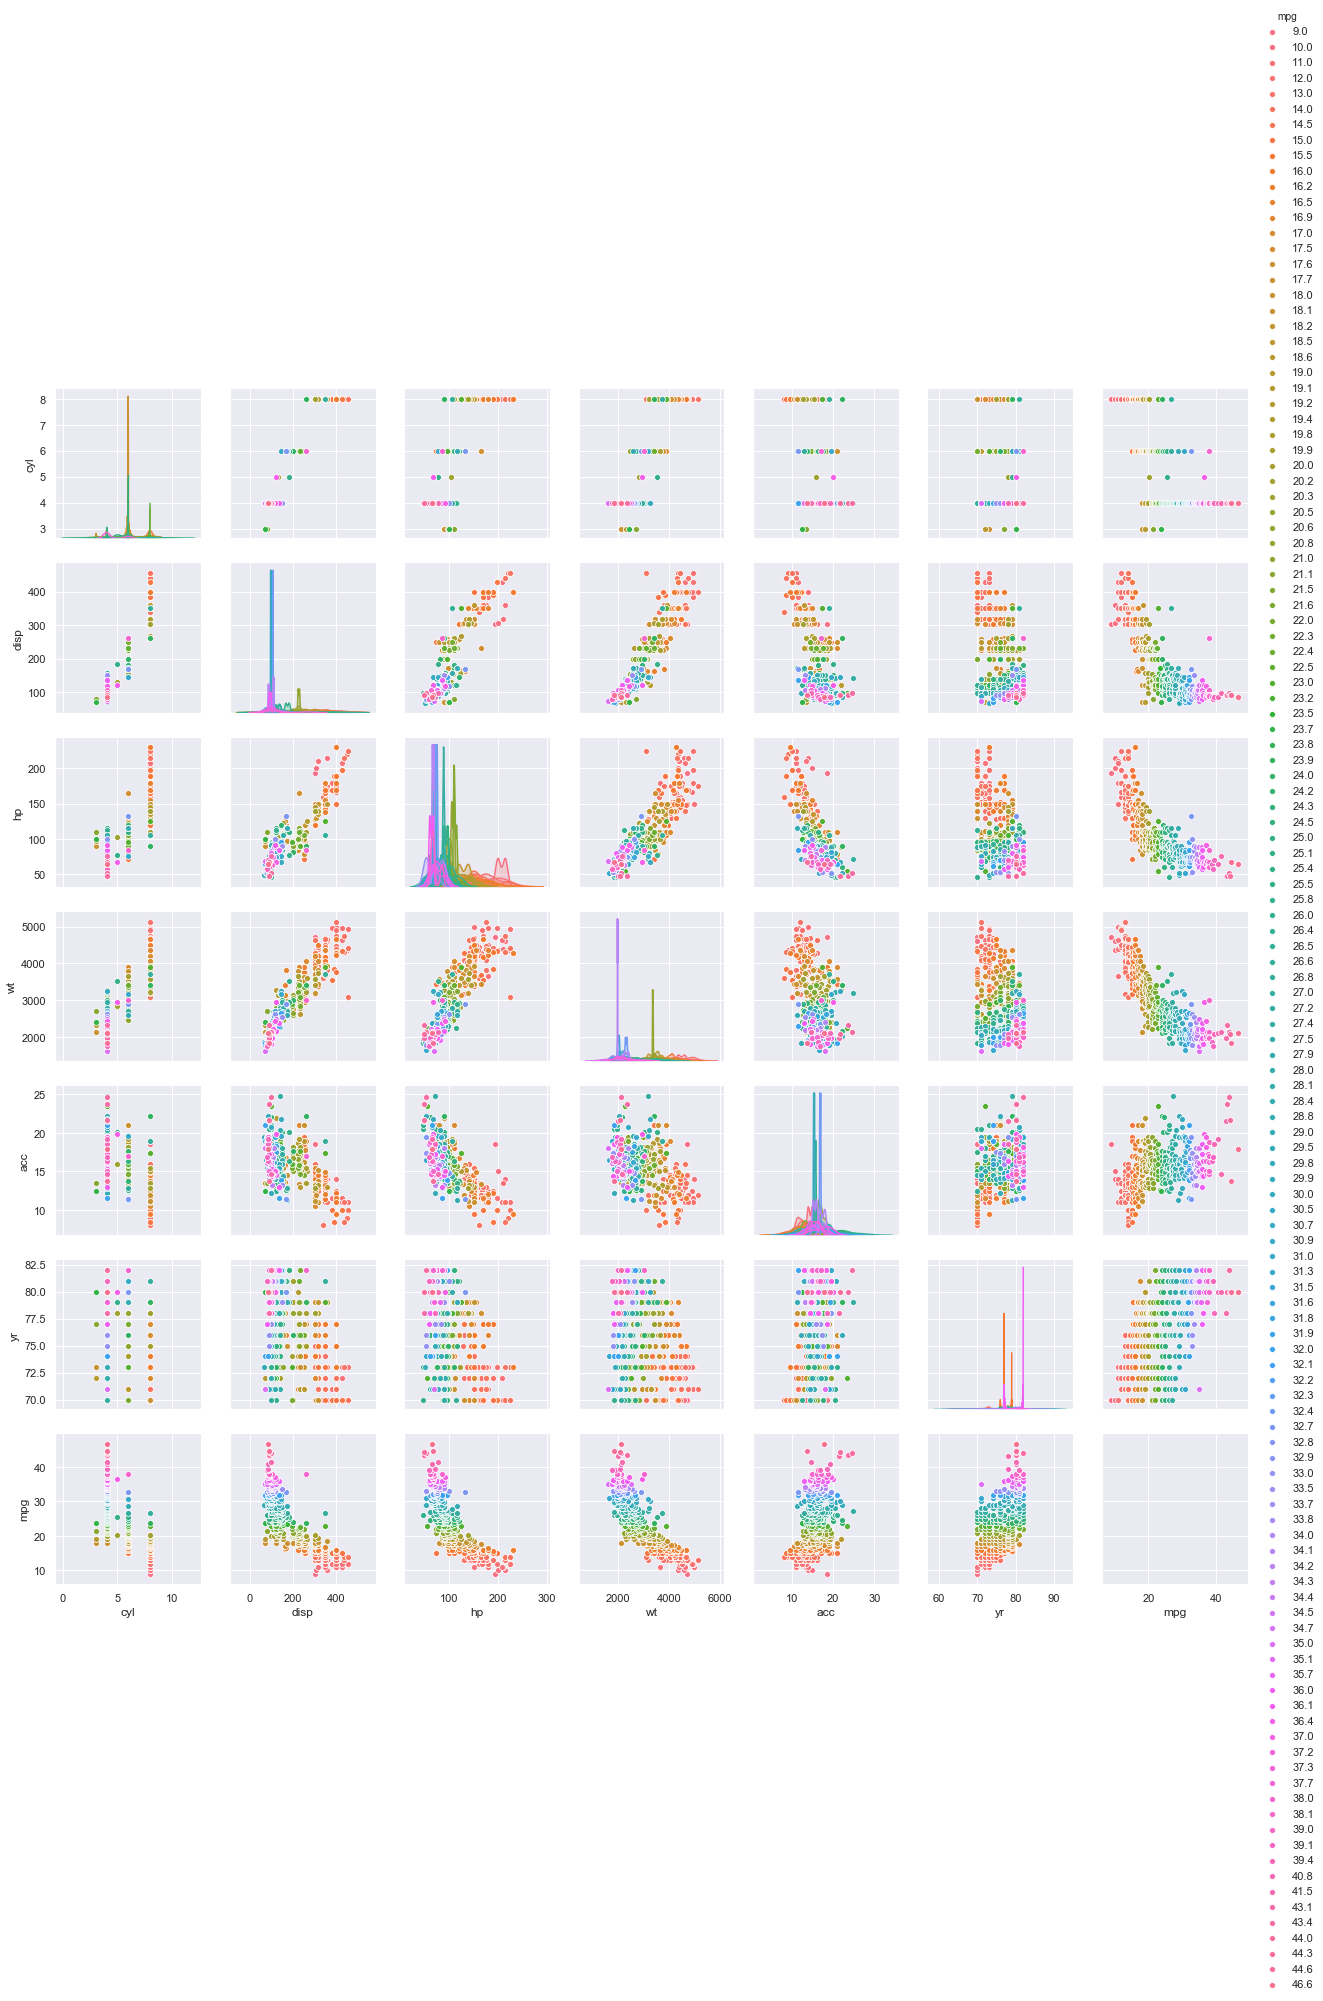

In [69]:

sns.pairplot(df,hue="mpg")
plt.show()

In [70]:
var='mpg'
df[df[var]== df[var].min()]

,cyl,disp,hp,wt,acc,yr,mpg
car name,,,,,,,
hi 1200d,8,304.0,193.0,4732,18.5,70,9.0


In [71]:
df[df[var]== df[var].max()]

,cyl,disp,hp,wt,acc,yr,mpg
car name,,,,,,,
mazda glc,4,86.0,65.0,2110,17.9,80,46.6


In [72]:
var='disp'
df[df[var]== df[var].min()]

,cyl,disp,hp,wt,acc,yr,mpg
car name,,,,,,,
fiat 128,4,68.0,49.0,1867,19.5,73,29.0


In [73]:
df[df[var]== df[var].max()]

,cyl,disp,hp,wt,acc,yr,mpg
car name,,,,,,,
pontiac catalina,8,455.0,225.0,4425,10.0,70,14.0
buick estate wagon (sw),8,455.0,225.0,3086,10.0,70,14.0
buick electra 225 custom,8,455.0,225.0,4951,11.0,73,12.0


In [74]:
var='hp'
df[df[var]== df[var].min()]

,cyl,disp,hp,wt,acc,yr,mpg
car name,,,,,,,
volkswagen 1131 deluxe sedan,4,97.0,46.0,1835,20.5,70,26.0
volkswagen super beetle,4,97.0,46.0,1950,21.0,73,26.0


In [75]:
df[df[var]== df[var].max()]

,cyl,disp,hp,wt,acc,yr,mpg
car name,,,,,,,
pontiac grand prix,8,400.0,230.0,4278,9.5,73,16.0


In [77]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 
Z=linkage(df,'average')
c,coph_dists=cophenet(Z,pdist(df))
print(c)

0.7589715128845351


## K - Means Clustering

In [79]:
df.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [91]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)


km.fit(df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']])
df["clusterLabels"]=km.predict(df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']])
df.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,clusterLabels
car name,,,,,,,,
chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0,0
buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0,0
plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0,0
amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0,0
ford torino,8,302.0,140.0,3449,10.5,70,17.0,0


In [94]:
df["clusterLabels"].unique()

array([0, 1], dtype=int64)

In [84]:
distortion = []

In [102]:
from scipy.spatial.distance import cdist
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortion.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

In [101]:
df.head()

,cyl,disp,hp,wt,acc,yr,mpg,clusterLabels
car name,,,,,,,,
chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0,0
buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0,0
plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0,0
amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0,0
ford torino,8,302.0,140.0,3449,10.5,70,17.0,0


In [103]:
distortion 

[731.5891688254809,
 368.5550809019055,
 248.39289198183616,
 183.1695448226435,
 158.48550917801532,
 141.804458183062,
 121.61756071018831,
 104.13832912014084,
 95.84303604766481,
 731.5888655283203,
 368.5550809019055,
 248.39266637178633,
 183.16953840466562,
 158.26912748969585,
 138.72647245957018,
 121.77088998803865,
 104.17145567666473,
 95.9747729240201,
 731.5891688254809,
 368.5550809019055,
 248.39289198183616,
 183.1695448226435,
 158.45642253973958,
 138.72656773235695,
 121.61756071018831,
 104.1085834957429,
 95.8978418896754,
 731.5891688254809,
 368.5550809019055,
 248.39289198183616,
 183.1695448226435,
 158.2691851086388,
 139.4608494987327,
 122.20640617506368,
 104.1085834957429,
 97.23698975674992]

In [104]:
km.cluster_centers_

array([[   7.23717949,  301.65384615,  137.56410256, 3879.53205128,
          14.54166667,   74.76282051,   16.45384615],
       [   4.30508475,  123.52330508,   82.59322034, 2381.38135593,
          16.20211864,   76.78389831,   28.06779661]])

In [105]:
km.inertia_

72921054.22783464

In [153]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(1,10):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']])
    
    #Add cluster information for each record in dataframe
    data['k_' + str(i)] = km.predict(df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']])
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

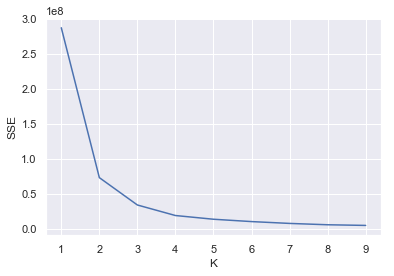

In [154]:
sns.lineplot(x='K', y='SSE', data=sse_df)

In [ ]:
## From the above graph, the optimal value of K can be taken as 3

In [155]:
sse_df

,K,SSE
0,1.0,2.869946e+08
1,2.0,7.292105e+07
2,3.0,3.384903e+07
3,4.0,1.881093e+07
4,5.0,1.349745e+07
5,6.0,1.015097e+07
6,7.0,7.530043e+06
7,8.0,5.615166e+06
8,9.0,4.677564e+06


In [ ]:
# From the above plot, the optimal value of k is 3

In [156]:
data.head()

,cyl,disp,hp,wt,acc,yr,mpg,k_1,k_2,k_3,k_4,k_5,k_6,k_7,k_8,k_9
car name,,,,,,,,,,,,,,,,
chevrolet chevelle malibu,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,0,1,1,0,3,4,4,7,3
buick skylark 320,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,0,1,0,0,4,4,4,2,3
plymouth satellite,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,0,1,1,0,3,4,0,7,8
amc rebel sst,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,0,1,1,0,3,4,0,7,8
ford torino,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,0,1,1,0,3,4,0,7,8


In [157]:
data.groupby('k_3').agg({'cyl':'median', 'disp':'median', 'hp':'median', 'wt':'median', 'acc':'median', 'yr':'median', 'mpg':'median' })

,cyl,disp,hp,wt,acc,yr,mpg
k_3,,,,,,,
0,1.483947,1.488732,1.184397,1.458669,-0.849741,-0.809884,-1.211785
1,0.309967,0.292679,-0.116263,0.213853,0.112027,0.277358,-0.442065
2,-0.864014,-0.922511,-0.766593,-0.915439,0.166467,0.277358,0.712514


In [158]:
from sklearn.preprocessing import StandardScaler
data = df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']]
scaler =StandardScaler()
scaler.fit(data)
data=scaler.transform(data)
data=pd.DataFrame(data)
data.columns=df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']].columns


In [159]:
data.index=df.index

In [160]:
km=KMeans(n_clusters=3)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [161]:
km.cluster_centers_

array([[ 0.3470398 ,  0.2384915 , -0.04424757,  0.30335558,  0.29291981,
         0.01126948, -0.4725839 ],
       [-0.86110766, -0.81098162, -0.6843036 , -0.79514908,  0.36356374,
         0.30830628,  0.76382895],
       [ 1.48394702,  1.48591152,  1.49929313,  1.38738246, -1.06597113,
        -0.66682598, -1.15155766]])

In [162]:
centroid=pd.DataFrame(km.cluster_centers_)
centroid

,0,1,2,3,4,5,6
0,0.347040,0.238491,-0.044248,0.303356,0.292920,0.011269,-0.472584
1,-0.861108,-0.810982,-0.684304,-0.795149,0.363564,0.308306,0.763829
2,1.483947,1.485912,1.499293,1.387382,-1.065971,-0.666826,-1.151558


In [163]:
centroid.columns=colNames=data.columns
centroid

,cyl,disp,hp,wt,acc,yr,mpg
0,0.347040,0.238491,-0.044248,0.303356,0.292920,0.011269,-0.472584
1,-0.861108,-0.810982,-0.684304,-0.795149,0.363564,0.308306,0.763829
2,1.483947,1.485912,1.499293,1.387382,-1.065971,-0.666826,-1.151558


In [164]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [165]:
km.labels_.shape

(392,)

In [166]:
data["clusters"]=km.labels_

In [167]:
data.head()

,cyl,disp,hp,wt,acc,yr,mpg,clusters
car name,,,,,,,,
chevrolet chevelle malibu,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,2
buick skylark 320,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,2
plymouth satellite,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,2
amc rebel sst,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,2
ford torino,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,2


## Linear Regression Model for three clusters 

In [168]:
# Data Set for Cluster 0
data_Cluster_0 =data[data['clusters']==0]

In [169]:
# Data Set for Cluster 1
data_Cluster_1 =data[data['clusters']==1]

In [170]:
# Data Set for Cluster 2
data_Cluster_2 =data[data['clusters']==2]

In [173]:
data_Cluster_0.head()

,cyl,disp,hp,wt,acc,yr,mpg,clusters
car name,,,,,,,,
plymouth duster,0.309967,0.034332,-0.246329,-0.170436,-0.014999,-1.625315,-0.185492,0
amc hornet,0.309967,0.043900,-0.194303,-0.239986,-0.014999,-1.625315,-0.698638,0
ford maverick,0.309967,0.053468,-0.506461,-0.460422,0.166467,-1.625315,-0.313779,0
amc gremlin,0.309967,0.043900,-0.376395,-0.388515,-0.196464,-1.625315,-0.313779,0
amc gremlin,0.309967,0.359658,-0.116263,-0.405018,-0.922327,-1.353505,-0.570352,0


### Linear Regression model for cluster 0

In [176]:
Y_Cluster_0=data_Cluster_0[["mpg"]]
X_Cluster_0=data_Cluster_0[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']]


In [178]:
from sklearn import model_selection
validation_size = 0.20
seed = 7

In [179]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_Cluster_0, Y_Cluster_0, test_size=validation_size, random_state=seed)

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [183]:
regression_model.coef_

array([[ 0.24273321, -0.09909794, -0.18020038, -0.42100404, -0.09512848,
         0.26113954]])

In [182]:
rmse = mean_squared_error(Y_validation, regression_model.predict(X_validation))
r2 = r2_score(Y_validation, regression_model.predict(X_validation))
print(rmse)
print(r2)

0.05415712198313836
-0.4719541901021709


### Linear Regression model for cluster 1

In [184]:
Y_Cluster_1=data_Cluster_1[["mpg"]]
X_Cluster_1=data_Cluster_1[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_Cluster_1, Y_Cluster_1, test_size=validation_size, random_state=seed)

In [185]:
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [186]:
regression_model.coef_

array([[ 1.2727075 , -0.53100292, -0.33390289, -0.61120652, -0.04957905,
         0.41411111]])

In [187]:
rmse = mean_squared_error(Y_validation, regression_model.predict(X_validation))
r2 = r2_score(Y_validation, regression_model.predict(X_validation))
print(rmse)
print(r2)

0.16905148796966077
0.6759213820805476


### Linear Regression model for cluster 2

In [191]:
Y_Cluster_2=data_Cluster_2[["mpg"]]
X_Cluster_2=data_Cluster_2[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_Cluster_2, Y_Cluster_2, test_size=validation_size, random_state=seed)

In [192]:
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [193]:
regression_model.coef_

array([[ 0.        , -0.14824208, -0.10760676, -0.06081614, -0.25646019,
         0.18704537]])